# Image Processing 
## Project - Part One

### Assigned by:

 * Student 1: 
 * Student 2:
 * Student 3: 



#### Auxiliary libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

## The functions

### zero_padding





In [2]:
def zero_padding(img, width, height, width_filter, height_filter):
    """
    The function gets image ,her size and size of the filter.   
    The function add zeros to the borders of the data as concatenated values to the image and return her.


    :param img:                     Image
    :type img:                        matrix of integers between 0 - 255
    :param width:                  The width of the image
    :type width:                     int 
    :param height:                The height of the image
    :type height:                    int 
    :param width_filter:         The width of the image
    :type width_filter:            int 
    :param height_filter:       The height of the image
    :type height_filter:           int 

    :return:                           Image with padding of the value zero
    :rtype:                            matrix of integers between 0 - 255 
    """
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    new_matrix = np.zeros((height+extra_height*2, width+extra_width*2))                                #create new matrix of zero
    new_matrix [extra_height:height+extra_height,extra_width:width+extra_width] = img       # insert the image to the center of the matrix
    return new_matrix


### extend_padding





In [3]:
def extend_padding(img, width, height, width_filter, height_filter):
    """
    The function gets image ,her size and size of the filter.   
    The function add the last values of the borders of the image to the borders of the data as concatenated values to the image and return her.


    :param img:                     Image
    :type img:                        matrix of integers between 0 - 255
    :param width:                  The width of the image
    :type width:                     int 
    :param height:                The height of the image
    :type height:                    int 
    :param width_filter:         The width of the image
    :type width_filter:            int 
    :param height_filter:       The height of the image
    :type height_filter:           int 

    :return:                           Image with padding of the last values of the borders of the image
    :rtype:                            matrix of integers between 0 - 255 
    """
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    new_matrix = np.zeros((height+extra_height*2, width+extra_width*2))                                     #Create new matrix of zero
    for h in range(extra_height):
        for w in range(extra_width):                                                                                                   #Adding values to the corners         
            new_matrix[h][w] =  img[0][0]
            new_matrix[height+extra_height+h][width+extra_width+w] =  img[height-1][width-1]
            new_matrix[h][width+extra_width+w] =  img[0][width-1]
            new_matrix[height+extra_height+h][w] =  img[height-1][0]
    
    for h in range(extra_height):                                                                                                     #Adding values to the vertical image borders
        for w in range(width):                                                                                                      
            new_matrix[h][extra_width+w] =  img[0][w]
            new_matrix[height+extra_height+h][extra_width+w] =  img[height-1][w]

            
    for h in range(height):                                                                                                              #Adding values to the Horizontal image borders
        for w in range(extra_width):                                                                                                      
            new_matrix[h+extra_height][w] =  img[h][0]
            new_matrix[extra_height+h][width+extra_width+w] =  img[h][width-1]
         
    new_matrix [extra_height:height+extra_height,extra_width:width+extra_width] = img           # insert the image to the center of the matrix
    return new_matrix


### filter

 


In [4]:
def filter(img, width, height, filter_matrix, width_filter, height_filter):
    """
    The function gets image ,her size and filter and his size.   
    The function filters the image according to the filter it received and return her.


    :param img:                     Image
    :type img:                        matrix of integers between 0 - 255
    :param width:                  The width of the image
    :type width:                     int 
    :param height:                The height of the image
    :type height:                    int
    :param filter_matrix:       The filter
    :type filter_matrix:            matrix 
    :param width_filter:         The width of the image
    :type width_filter:            int 
    :param height_filter:       The height of the image
    :type height_filter:           int 

    :return:                           The image after filtering
    :rtype:                            matrix of integers between 0 - 255     
    """
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    padd_matrix =  extend_padding(img, width, height, width_filter, height_filter)         #Adding  extend padding

    new_matrix = np.zeros((height+extra_height*2,width+extra_width*2)) 
  
    for  i in range(extra_height,height+extra_height):
        for j in range(extra_width,width+extra_width):
            for h in range(height_filter):
                for w in range(width_filter):
                    new_value = new_matrix[i][j] + (filter_matrix[h][w] * padd_matrix [ i - extra_height+h][ j - extra_width+w]) 
                    if (new_value>255):
                        new_value = 255
                    elif (new_value<0):
                        new_value = 0
                    new_matrix[i][j] =  new_value
             
    new_matrix = padd_matrix - new_matrix
    return new_matrix [extra_height:height+extra_height,extra_width:width+extra_width]

## Checking the functions

* Upload the square image
* Present her
* Taking the height and width values of the image

Height =  480 
Width =  480


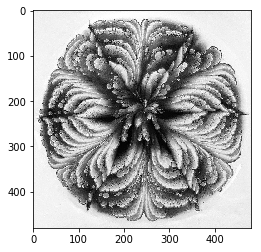

In [5]:
image = cv2.imread("flower1.jpg",0)
plt.imshow(image,cmap="gray")
height, width = image.shape
print("Height = ",height ,"\nWidth = ",width )



* Checking the zero_padding function

Height =  680 
Width =  680


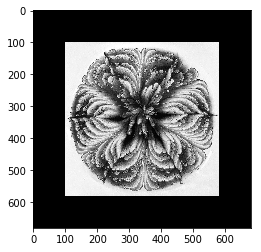

In [6]:
new_img_zero = zero_padding(image, width, height ,200,200)
plt.imshow(new_img_zero,cmap="gray")
print("Height = ",new_img_zero.shape[0] ,"\nWidth = ",new_img_zero.shape[1] )


* Checking the extend_padding function

Height =  680 
Width =  680


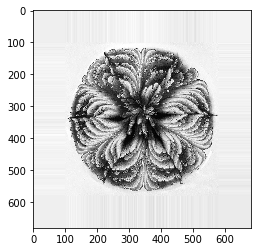

In [7]:
new_img_extend = extend_padding(image, width, height ,200,200)
plt.imshow(new_img_extend,cmap="gray")
print("Height = ",new_img_extend.shape[0] ,"\nWidth = ",new_img_extend.shape[1] )


* Laplasian filter setting

In [8]:
laplacian = [[0,-1,0],
            [-1,4,-1],
            [0,-1,0]]
height_filter_laplac = len(laplacian)
width_filter_laplac = len(laplacian[1])


* Checking the filter function with laplacian

Height =  480 
Width =  480


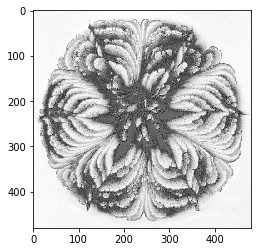

In [9]:
new_img_filter = filter(image, width, height, laplacian, width_filter_laplac, height_filter_laplac)
plt.imshow(new_img_filter,cmap="gray")
print("Height = ",new_img_filter.shape[0] ,"\nWidth = ",new_img_filter.shape[1] )



* gaussian filter setting

In [10]:
gaussian = [[(1/16),(2/16),(1/16)],
            [(2/16),(4/16),(2/16)],
            [(1/16),(2/16),(1/16)]]
height_filter_gaus = len(gaussian)
width_filter_gaus = len(gaussian[1])

* Checking the filter function with gaussian

Height =  480 
Width =  480


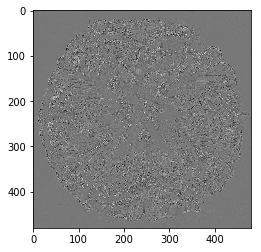

In [11]:
new_img_filter = filter(image, width, height, gaussian, width_filter_gaus, height_filter_gaus)
plt.imshow(new_img_filter,cmap="gray")
print("Height = ",new_img_filter.shape[0] ,"\nWidth = ",new_img_filter.shape[1] )

* Gradient_dx filter setting

In [12]:
Gradient_dx = [[(-1),(0),(1)],
            [(-1),(0),(1)],
            [(-1),(0),(1)],
            [(-1),(0),(1)],]
height_filter_dx = len(Gradient_dx)
width_filter_dx = len(Gradient_dx[1])

* Checking the filter function with Gradient_dx

Height =  480 
Width =  480


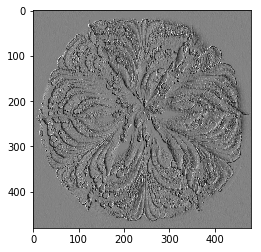

In [13]:
new_img_filter = filter(image, width, height, Gradient_dx, width_filter_dx, height_filter_dx)
plt.imshow(new_img_filter,cmap="gray")
print("Height = ",new_img_filter.shape[0] ,"\nWidth = ",new_img_filter.shape[1] )

* Upload rectangular image

Height =  253 
Width =  590


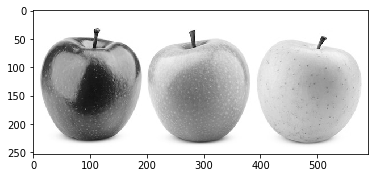

In [14]:
image2 = cv2.imread("apples.jpg",0)
plt.imshow(image2,cmap="gray")
height, width = image2.shape
print("Height = ",height ,"\nWidth = ",width )


* Checking the zero_padding function on rectangular image

Height =  453 
Width =  790


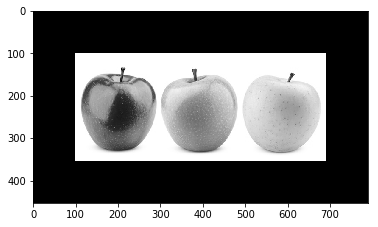

In [15]:
new_img_extend = zero_padding(image2, width, height ,200,200)
plt.imshow(new_img_extend,cmap="gray")
print("Height = ",new_img_extend.shape[0] ,"\nWidth = ",new_img_extend.shape[1] )

* Checking the extend_padding function on rectangular image

Height =  453 
Width =  790


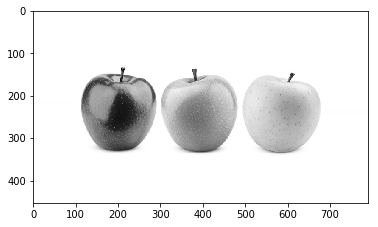

In [16]:
new_img_extend = extend_padding(image2, width, height ,200,200)
plt.imshow(new_img_extend,cmap="gray")
print("Height = ",new_img_extend.shape[0] ,"\nWidth = ",new_img_extend.shape[1] )

* Checking the filter function on rectangular image

Height =  253 
Width =  590


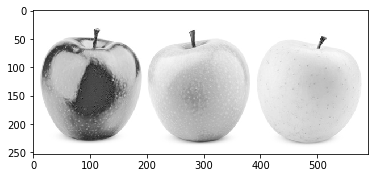

In [17]:
new_img_filter = filter(image2, width, height, laplacian, width_filter_laplac, height_filter_laplac)
plt.imshow(new_img_filter,cmap="gray")
print("Height = ",new_img_filter.shape[0] ,"\nWidth = ",new_img_filter.shape[1] )


### extra

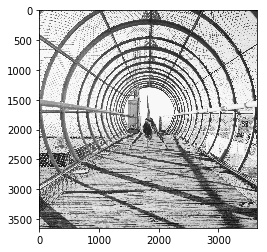

In [18]:
img = cv2.imread("pic2.jpg",0)
plt.imshow(img,cmap="gray")
height, width = img.shape


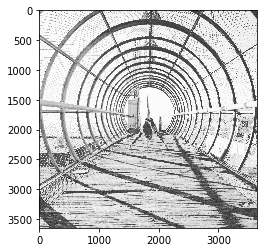

In [19]:
y = filter(img, width, height, laplacian, width_filter_laplac, height_filter_laplac)
plt.imshow(y,cmap="gray")


(4648, 5648)

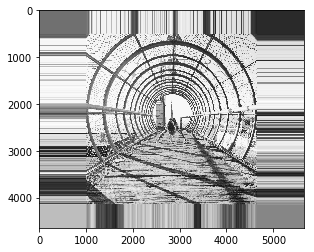

In [20]:
new = extend_padding(img, width, height ,2000,1000)
plt.imshow(new,cmap="gray")
new.shape

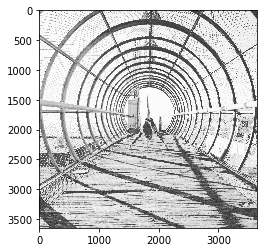

In [21]:
plt.imshow(y,cmap="gray")
